<center><H2>Quantitative Structure-Property Relationships</H2></center>



Quantitative Structure-Property Relationships (QSPR) and Quantitative
Structure-Activity Relationships (QSAR) use statistical models to relate a set
of predictor values to a response variable. Molecules are described using a set
of *descriptors*, and then mathematical relationships can be developed to explain
observed properties. In QSPR and QSAR, physico-chemical properties of theoretical
descriptors of chemicals are used to predict either a physical property or a
biological outcome.

<div class="alert alert-block alert-info">

Objectives:

* Explore the Mordred library to algorithmically calculate descriptors for molecules 
* Use molecular descriptors to calculate QSPR
* Use multiple linear regression to create best predictive equation for boiling points of alkanes


## Molecular Descriptors



A molecular descriptor is &ldquo;final result of a logical and mathematical procedure,
which transforms chemical information encoded within a symbolic representation
of a molecule into a useful number or the result of some standardized
experiment&rdquo; (Todeschini, R.; Consonni, V. *Molecular descriptors for
chemoinformatics* **2009** Wiley‑VCH, Weinheim). You are already familiar with
descriptors such as molecular weight or number of heavy atoms and we have
queried PubChem for data such as XLogP. We&rsquo;ll examine just a few simple
descriptors, but thousands have been developed for applications in QSPR.



## Using rdkit and Mordred to calculate descriptors



In the lecture portion of this activity you have been using algorithms to calulate some molecular descriptors based on graph theory (e.g. Wiener Index). This is time consuming for an individual, but programs can be used to complete this much
easier. We will use the rdkit and Mordred python libraries to help us out.

<a href="https://jcheminf.biomedcentral.com/articles/10.1186/s13321-018-0258-y">Mordred is a molecular descriptor calculator</a> that was originally released in 2018 as an python library that supports more than 1800 molecular discriptors. It was developed to overcome issues other libraries have such as software bugs and insufficient updates. 

Originally developed by Hirotomo Moriwaki, it is now maintained by the Mordred Communicty https://github.com/JacksonBurns/mordred-community. It can be installed using conda-forge.

```python
conda install -c conda-forge mordredcommunity
```

Mordred's documentation can be found here: https://mordred-descriptor.github.io/documentation/master/#


In [1]:
from mordred import Calculator, descriptors

In [2]:
# calculate total descriptors in Mordred library
n_all = len(Calculator(descriptors, ignore_3D=False).descriptors)
n_2D = len(Calculator(descriptors, ignore_3D=True).descriptors)
print("Descriptors in the Mordred library")
print("2D:    {:5}\n3D:    {:5}\n------------\ntotal: {:5}".format(n_2D, n_all - n_2D, n_all))

Descriptors in the Mordred library
2D:     1613
3D:      213
------------
total:  1826


### Wiener Index



We already calculated the Wiener index for *n*-pentane and 2-methylpentane with the accompanying lecture materials. Now
let&rsquo;s have Mordred do it for us.



In [3]:
from rdkit import Chem                                 # imports the Chem module from rdkit
from mordred import WienerIndex                        # imports the Wiener index from mordred
pentane = Chem.MolFromSmiles('CCCCC')                  # Use rdkit to create a mol file from the smiles string for n-pentane
methyl_pentane = Chem.MolFromSmiles('CCCC(C)C')        #  and for 2-methylpentane
wiener_index = WienerIndex.WienerIndex()               # create descriptor instance for Wiener index
result1 = wiener_index(pentane)                        # calculate wiener index for n-pentane
result2 = wiener_index(methyl_pentane)                 #  and for 2-methylpentane
print("The Wiener index for n-pentane is: ", result1)  # display result
print("The Wiener index for 2-methylpentane is: ", result2)

The Wiener index for n-pentane is:  20
The Wiener index for 2-methylpentane is:  32


### Zagreb Indices



And we can do the same for the different Zagreb indices for *n*-pentane and
2-methylpentane.



In [4]:
from mordred import ZagrebIndex

zagreb_index1 = ZagrebIndex.ZagrebIndex(version = 1)            # create descriptor instance for Zagreb index 1
zagreb_index2 = ZagrebIndex.ZagrebIndex(version = 2)            # create descriptor instance for Zagreb index 2

result_Z1 = zagreb_index1(pentane)                              # calculate Z1 descriptor value for n-pentane
result_Z2 = zagreb_index2(pentane)                              # calculate Z2 descriptor value for n-pentane
print("The Zagreb index 1 for n-pentane is:", result_Z1)
print("The Zagreb index 2 for n-pentane is:", result_Z2)

result_Z1 = zagreb_index1(methyl_pentane)                       # and for 2-methylpentane as well
result_Z2 = zagreb_index2(methyl_pentane)                      
print("The Zagreb index 1 for 2-methylpentane is:", result_Z1)
print("The Zagreb index 2 for 2-methylpentane is:", result_Z2)

The Zagreb index 1 for n-pentane is: 14.0
The Zagreb index 2 for n-pentane is: 12.0
The Zagreb index 1 for 2-methylpentane is: 20.0
The Zagreb index 2 for 2-methylpentane is: 18.0


As you can see from the code above, each index will have different code that
needs to be followed for programming. Each descriptor and the resulting code
syntax can be found here
[http://mordred-descriptor.github.io/documentation/master/api/modules.html](http://mordred-descriptor.github.io/documentation/master/api/modules.html)



### Looping through a list of molecules



Now that we have an understanding on how rdkit and mordred work to get our
descriptors, let&rsquo;s simplify the code using a looping structure:



In [5]:
smiles = ["CCC", "CCCC", "CCCCC", "CCCC(C)C","CC(C)C(C)C"]         #store smiles strings in a list

for smile in smiles:
    mol = Chem.MolFromSmiles(smile)                      # convert smiles string to mol file
    result_Z1 = zagreb_index1(mol)                       # calculate Z1 descriptor value
    result_Z2 = zagreb_index2(mol)                       # calculate Z2 descriptor value
    print("The Zagreb index 1 for", smile, "is:", result_Z1)
    print("The Zagreb index 2 for", smile, "is:", result_Z2)
    print()

The Zagreb index 1 for CCC is: 6.0
The Zagreb index 2 for CCC is: 4.0

The Zagreb index 1 for CCCC is: 10.0
The Zagreb index 2 for CCCC is: 8.0

The Zagreb index 1 for CCCCC is: 14.0
The Zagreb index 2 for CCCCC is: 12.0

The Zagreb index 1 for CCCC(C)C is: 20.0
The Zagreb index 2 for CCCC(C)C is: 18.0

The Zagreb index 1 for CC(C)C(C)C is: 22.0
The Zagreb index 2 for CC(C)C(C)C is: 21.0



## Using descriptors to predict molecular properties



For this exercise we will take a series of alkanes and create an equation that
will allow us to predict boiling points. We will start with a 30 molecule alkane
training set and obtain various descriptors and see how they can predict
the physical property boiling point.

For this exercise we will be using the [pandas](https://pandas.pydata.org/) (Python Data Analysis) library to
help us read, write and manage data. We will also use matplotlib to generate
graphs.



### Boiling Point data



Let&rsquo;s start by reading and graphing a set of boiling point data. First we read
our csv file into a pandas &ldquo;dataframe&rdquo;. Notice that we can generate a nicely
formatted table from our dataframe by just entering the name of the dataframe on
the last line.



In [6]:
import pandas as pd        # import the Python Data Analysis Library with the shortened name pd
df = pd.read_csv("BP.csv") # read in the file into a pandas dataframe
df                         # print the dataframe

,compound,name,BP_C,BP_K,SMILES,MW
0,1,Methane,-162.2,110.95,C,16.043
1,2,Ethane,-88.6,184.55,CC,30.070
2,3,propane,-42.2,230.95,CCC,44.100
3,4,butane,-0.1,273.05,CCCC,58.120
4,5,2-methylpropane,-11.2,261.95,CC(C)C,58.120
5,6,pentane,36.1,309.25,CCCCC,72.150
6,7,2-methylbutane,27.0,300.15,CC(C)CC,72.150
7,8,"2,2-dimethylpropane",9.5,282.65,CC(C)(C)C,72.150
8,9,hexane,68.8,341.95,CCCCCC,86.180
9,10,2-methylpentane,60.9,334.05,CC(C)CCC,86.180


### Graphing the data



Now we can graph the data using matplotlib.



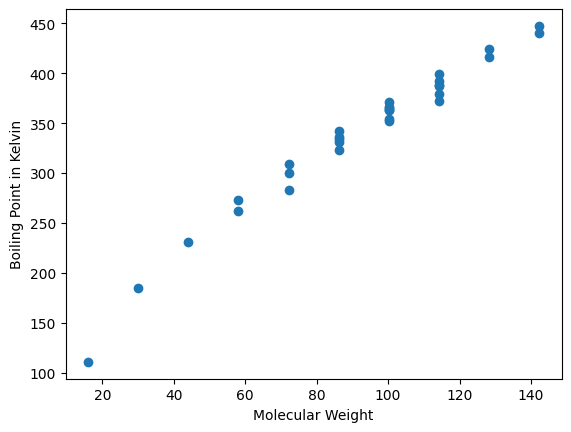

In [7]:
import matplotlib.pyplot as plt

plt.scatter(df.MW, df.BP_K)     # plot of boiling point (in K) vs molecular weight
plt.xlabel('Molecular Weight')
plt.ylabel('Boiling Point in Kelvin')
plt.show()

<div class="alert alert-block alert-warning">
<strong>Check your understanding</strong>
    
* What is the boiling point of a molecule with molecular weight = 60 g/mol?
* What is the boiling point of a molecule with molecular weight = 120 g/mol?

Is molecular weight alone a good descriptor to predict boiling points for this series of alkanes? 

Clearly from the data we can see that we have multiple molecules with the same
molecular weight, but different boiling points. Molecular weight is therefore
not the best predictor of boiling point. We can see if there are other
descriptors that we can use such as Weiner or Zagreb. Let&rsquo;s add various
descriptors to the dataframe.



### Adding descriptors to the dataset



We can now calculate the Wiener and Zagreb indices for each of our
hydrocarbons and add them to the dataframe.



In [8]:
# create new lists to store results we calculate
result_Wiener= []
result_Z1= []
result_Z2= []

for index, row in df.iterrows():                # iterate through each row of the CSV data
    SMILE = row['SMILES']                       # get SMILES string from row
    mol = Chem.MolFromSmiles(SMILE)             # convert smiles string to mol file
    result_Wiener.append(wiener_index(mol))     # calculate Wiener index descripter value
    result_Z1.append(zagreb_index1(mol))        # calculate zagreb (Z1) descriptor value
    result_Z2.append(zagreb_index2(mol))        # calculate zagreb (Z2) descriptor value

df['Wiener'] = result_Wiener           # add the results for WienerIndex to dataframe
df['Z1'] = result_Z1                   # add the results for Zagreb 1 to dataframe
df['Z2'] = result_Z2                   # add the results for Zagreb 2 to dataframe
df                                     # print the updated dataframe

,compound,name,BP_C,BP_K,SMILES,MW,Wiener,Z1,Z2
0,1,Methane,-162.2,110.95,C,16.043,0,0.0,0.0
1,2,Ethane,-88.6,184.55,CC,30.070,1,2.0,1.0
2,3,propane,-42.2,230.95,CCC,44.100,4,6.0,4.0
3,4,butane,-0.1,273.05,CCCC,58.120,10,10.0,8.0
4,5,2-methylpropane,-11.2,261.95,CC(C)C,58.120,9,12.0,9.0
5,6,pentane,36.1,309.25,CCCCC,72.150,20,14.0,12.0
6,7,2-methylbutane,27.0,300.15,CC(C)CC,72.150,18,16.0,14.0
7,8,"2,2-dimethylpropane",9.5,282.65,CC(C)(C)C,72.150,16,20.0,16.0
8,9,hexane,68.8,341.95,CCCCCC,86.180,35,18.0,16.0
9,10,2-methylpentane,60.9,334.05,CC(C)CCC,86.180,32,20.0,18.0


Now we can see how each of these descriptors are related to the boiling points
of their respective compounds.



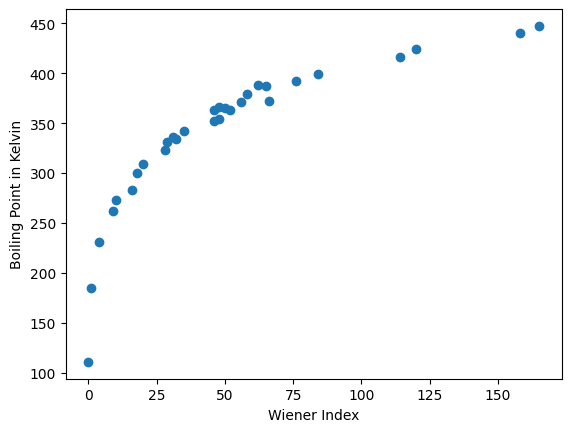

In [9]:
plt.scatter(df.Wiener, df.BP_K) # plot of BP versus Wiener index
plt.xlabel('Wiener Index')
plt.ylabel('Boiling Point in Kelvin')
plt.show()

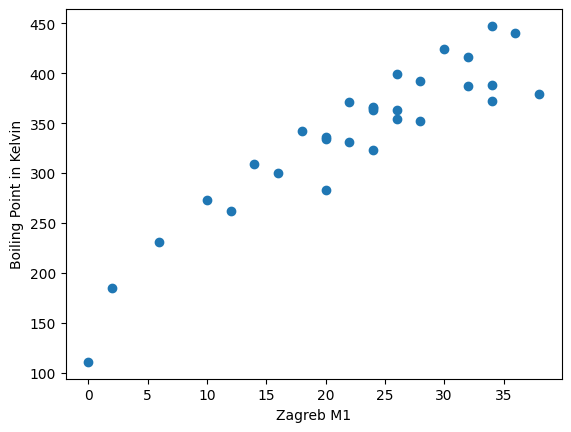

In [10]:
plt.scatter(df.Z1, df.BP_K) # plot of BP versus Zagreb M1
plt.xlabel('Zagreb M1')
plt.ylabel('Boiling Point in Kelvin')
plt.show()

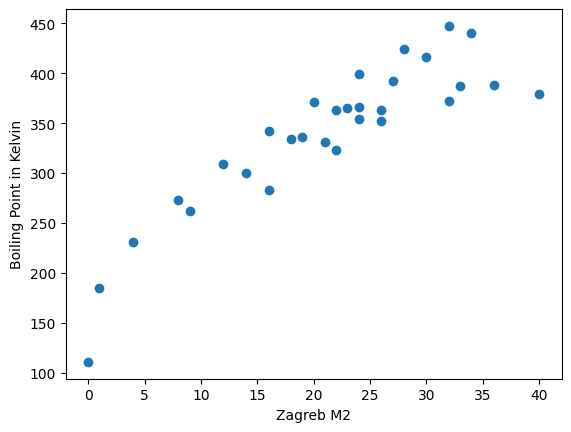

In [11]:
plt.scatter(df.Z2, df.BP_K) # plot of BP versus Zagreb M2
plt.xlabel('Zagreb M2')
plt.ylabel('Boiling Point in Kelvin')
plt.show()

<div class="alert alert-block alert-warning">
<strong>Check your understanding</strong>

* Do these other indicators provide some insight into predicting boiling point?
* Do they perform better or worse than boiling point?
* If no one descriptor (independent variable) represents boiling point (dependent variable), might a combination of these descriptors predict the boiling point?


## Mulitple regression analysis using statsmodels



We have been attempting to describe the relationship between one variable (MW, 2D molecular descriptors) and boiling point by creating a regression model and observing (through intraocular analysis *i.e. eye-balling it*) if there is a relationship to estimate how much the dependent variable changes in relation to the independent variable. 

Multiple linear regression is a statistical method that can use multiple independent variables to predict the effect on the dependent variable. 

The [statsmodels](https://www.statsmodels.org/stable/index.html) package provides numerous tools for performing statistical
analysis using Python. In this case, we want to perform a *multiple linear
regression* using all of our descriptors (molecular weight, Wiener index, Zagreb
indices) to help predict our boiling point.



In [12]:
import statsmodels.api as sm           # import the statsmodels library as sm
X = df[["MW", "Wiener", "Z1", "Z2"]]   # select our independent variables
X = sm.add_constant(X)                 # add an intercept to our model
y = df[["BP_K"]]                       # select BP as our dependent variable
model = sm.OLS(y,X).fit()              # set up our model
predictions = model.predict(X)         # make the predictions
print(model.summary())                 # print out statistical summary

                            OLS Regression Results                            
Dep. Variable:                   BP_K   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     1124.
Date:                Tue, 12 Aug 2025   Prob (F-statistic):           8.16e-28
Time:                        05:45:22   Log-Likelihood:                -93.019
No. Observations:                  30   AIC:                             196.0
Df Residuals:                      25   BIC:                             203.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         55.5695      6.745      8.238      0.0

<div class="alert alert-block alert-warning">
<strong>Check your understanding</strong>

There is quite a bit of statistical data reported from the statsmodel package. Let's focus on a few pieces of data.

* What does the calcualte R<sup>2</sup> tell you about the equation of the multiple linear regression?
* What do the sign and magnitude of the coefficients tell you about the correlation between independent variable and the dependent variable?
* What does the p-value indicate about these independent variables predicting the dependent variable?

Note above that we now have coeffiecients for an equation that can be used for prediction of boiling points for molecules not included in our dataset. The equation would be:

    Predicted BP = 4.4325 * MW - 0.6411 * Weiner - 4.3920 * Z1 + 0.2982 * Z2 + 55.5695

We can use this equation to predict the boiling point of a new molecule. However, before we do, we need to explore the validity of the model.

### Model summary and analysis using partial regression plots



A quick look at the results summary shows that the model has an excellent
R-squared value. Upon more careful examination, you may notice that one of our
descriptors has a very large p-value (`Z2`). This would indicate that perhaps the Z2
descriptor is not working well in this case. We can generate a more graphical
interpretation that will make this more obvious.



/apps/share64/debian10/anaconda/anaconda-7/envs/MolSSIv2/lib/python3.10/site-packages/statsmodels/graphics/regressionplots.py:430: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  fig = abline_plot(0, fitted_line.params[0], color='k', ax=ax)
/apps/share64/debian10/anaconda/anaconda-7/envs/MolSSIv2/lib/python3.10/site-packages/statsmodels/graphics/regressionplots.py:430: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  fig = abline_plot(0, fitted_line.params[0], color='k', ax=ax)
/apps/share64/debian10/anaconda/anaconda-7/envs/MolSSIv2/lib/python3.10/site-packages/statsmodels/graphics/regressionplots.py:430: FutureWarning: 

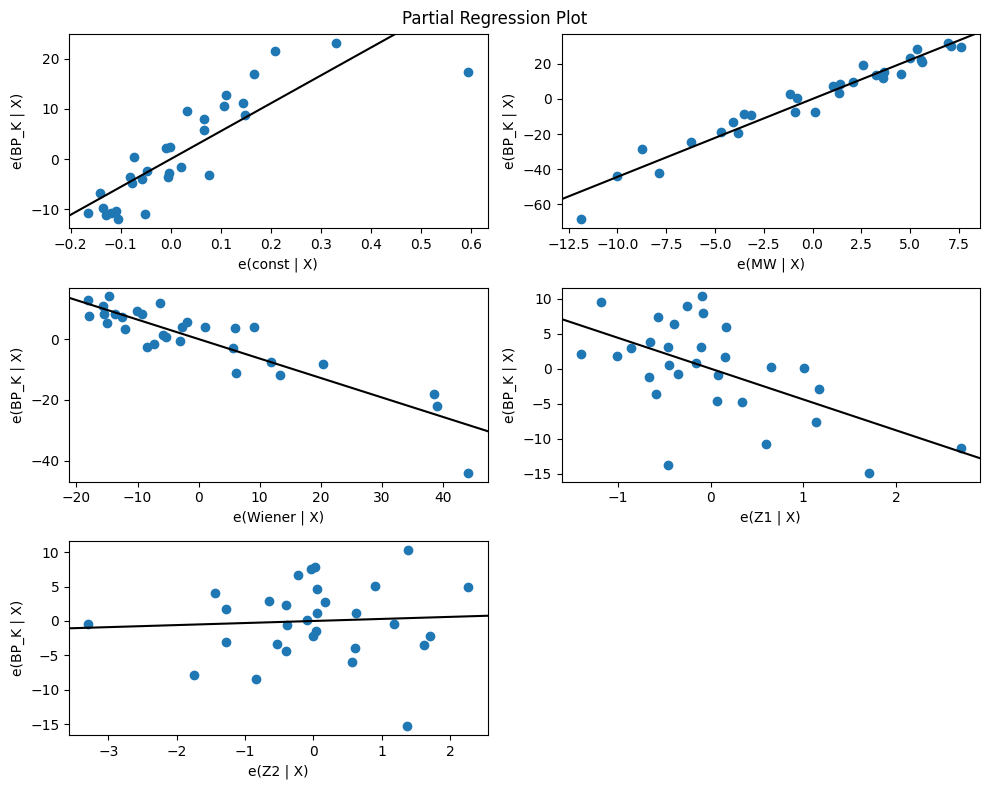

In [13]:
fig = plt.figure(figsize=(10,8))
fig = sm.graphics.plot_partregress_grid(model, fig=fig)

Part of the reason that Z2 may not be predictive in this model is that there is colinearity with the Z1 descriptor. Both descriptors have similar calculations (as outlined in the associating reading page for this activity). Later on in this exercise we can explore dropping this descriptor.

### How good is our model?



If we look at a plot of actual versus predicted boiling points



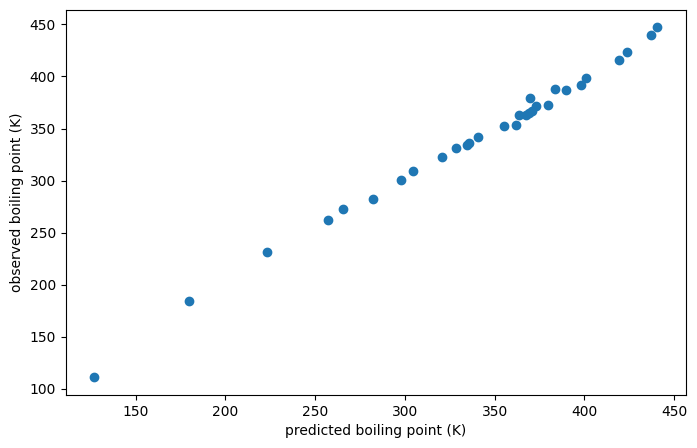

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.213e+05
Date:                Tue, 12 Aug 2025   Prob (F-statistic):                    4.52e-54
Time:                        05:45:23   Log-Likelihood:                         -93.015
No. Observations:                  30   AIC:                                      188.0
Df Residuals:                      29   BIC:                                      189.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [14]:
pred_bp = model.fittedvalues.copy()       # use our model to create a set of predicted bp's
fig, ax = plt.subplots(figsize=(8, 5))
lmod = sm.OLS(pred_bp, df.BP_K)           # linear regression of observed vs predicted bp's
res = lmod.fit()                          # run fitting
plt.scatter(pred_bp, df.BP_K)             # plot of of observed vs predicted bp's
plt.ylabel('observed boiling point (K)')
plt.xlabel('predicted boiling point (K)')
plt.show()
print(res.summary())                      # print linear regression stats summary

The model appears to have very good predictability (*R<sup>2</sup>* = 1.000) within the original 30 molecule data set. One way to test this model is to use a new molecule with its descriptors to see how well it is predicted. One molecule NOT in the dataset is **2-methylheptane**. It has the following data:
-  MW = 114.232
-  Wiener Index = 79
-  Z1 = 28
-  Z2 = 26
-  Boiling Point = 390.6 K

Using the equation from above we can determine that the boiling point from the equation 
-  Predicted BP = 4.4325 * MW - 0.6411 * Weiner Index - 4.3920 * Z1 + 0.2982 * Z2 + 55.5695
  

In [15]:
#calculate boiling point of 2-methylheptane
from mordred import Weight   # get molecular weight descriptor from mordred
weight = Weight.Weight()    # create molecular weight calculator

methylheptane = Chem.MolFromSmiles('CCCCCC(C)C')  # generate an object for 2-methylheptane

MW = weight(methylheptane)                  # calculate molecular weight of 2-methylheptane
WienerIndex = wiener_index(methylheptane)   # calculate Wiener Index of 2-methylheptane
Z1 = zagreb_index1(methylheptane)           # calculate Z1 descriptor of 2-methylheptane
Z2 = zagreb_index2(methylheptane)           # calculate Z2 descriptor of 2-methylheptane

PredictBP= 4.4325 * MW - 0.6411 * WienerIndex - 4.3920 * Z1 + 0.2982 * Z2 + 55.5695    # predict boiling point
print('Calculated boiling point of 2-methylheptane is',PredictBP,'K.')

                          

Calculated boiling point of 2-methylheptane is 395.62912017811993 K.


<div class="alert alert-block alert-warning">
<Strong>Check your understanding </Strong>

* How does this prediction compare to the accepted literature value of 390.6 K?

We had mentioned earlier that Z2 may not be very predictive in this model. We can remove the variable an rerun the analysis to see if we can improve the predictability of the model.

In [16]:
import statsmodels.api as sm           # import the statsmodels library as sm
X = df[["MW", "Wiener", "Z1"]]         # select our independent variables, this time without Z2
X = sm.add_constant(X)                 # add an intercept to our model
y = df[["BP_K"]]                       # select BP as our dependent variable
model = sm.OLS(y,X).fit()              # set up our model
predictions = model.predict(X)         # make the predictions
print(model.summary())                 # print out statistical summary

                            OLS Regression Results                            
Dep. Variable:                   BP_K   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     1552.
Date:                Tue, 12 Aug 2025   Prob (F-statistic):           1.99e-29
Time:                        05:45:23   Log-Likelihood:                -93.078
No. Observations:                  30   AIC:                             194.2
Df Residuals:                      26   BIC:                             199.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         55.4979      6.624      8.378      0.0

<div class="alert alert-block alert-warning">
<Strong>Check your understanding </Strong>

* After removal of Z2, what happened to the R<sup>2</sup> and p-values?
* In the code cell below, write code to predice the boiling point of 2-methylheptane.
* Does dropping Z2 change the result of the calculation?


In [17]:
#calculate boiling point of 2-methylheptane with new coefficients


<div class="alert alert-block alert-danger">


Keep in mind that we have completed this analysis with only a training set of 30 molecules. If the training set had more molecules, you should be able to develop a better model.

 <div class="alert alert-block alert-success">
      <H1><center>Homework</center></H1>

## Assignment 1
You originally ran this analysis on a 30 molecule data set (BP.CSV). You also have available to you a 102 molecule data set (102BP.CSV). 

Create a new python notebook titled **`QSPR_Assignment_1`**.

In the new notebook complete the above analysis using the expanded data set to determine if a better predictive model can be obtained with a larger training set. Note that 2-methylheptane is in this new dataset so you will need to choose a new test molecule. Use your chemical intuition.
<div class="alert alert-block alert-success">
In a final markdown cell of the notebook, explain why you chose the test molecule and how close did the equation predict its boiling point. Explain why the equation did or did not predict well.

## Assignment 2

Create a new python notebook titled **`QSPR_Assignment_2`**. Create code to predict the 102 molecule data set (102BP.CSV).

In addition to molecular weight, choose 2 to 3 other calculated descriptors found in Mordred http://mordred-descriptor.github.io/documentation/master/api/modules.html
<div class="alert alert-block alert-info">
some descriptors to consider include:

* <a href="https://mordred-descriptor.github.io/documentation/master/api/mordred.BalabanJ.html?highlight=balaban#mordred.BalabanJ.BalabanJ" >BalabanJ (another topological index)</a>
    * `from mordred import BalabanJ`
    * `balabanj = BalabanJ.BalabanJ()    # create Balaban J calculator`

* <a href="https://mordred-descriptor.github.io/documentation/master/api/mordred.ABCIndex.html" >ABCIndex(another topological index)</a>
    * `from mordred import ABCIndex`
    * `abcindex = ABCIndex.ABCIndex()    # create ABC Index calculator`
      
* <a href="https://mordred-descriptor.github.io/documentation/master/api/mordred.ABCIndex.html#:~:text=Graovac%2DGhorbani%20atom%2Dbond%20connectivity%20index%20descriptor." >Graovac-Ghorbani atom-bond connectivity index descriptor.</a>
    * `from mordred import ABCGGIndex`
    * `abcindex = ABCIndex.ABCGGIndex()    # create Graovac-Ghorbani atom-bond connectivity calculator`


* <a href="https://mordred-descriptor.github.io/documentation/master/api/mordred.VdwVolumeABC.html" >van der Waals volume</a>
    * `from mordred import VdwVolumeABC`
    * `abcindex = VdwVolumeABC.VdwVolumeABC()    # create van der Waals volume calculator`

</div>


Complete a new analysis with your chosen descriptors:
* Create a dataframe with molecular weight and all your new descriptors
* Complete simple linear analysis for each of your new descriptors.
* Complete a multiple linear regression to create an equation that best represents the data boiling point data and your descriptors.
* Make a plot of Actual vs Predicted BP for your regression.
* Choose a new molecule not in the dataset (not 2-methylheptane as it is in the dataset, be creative and use chemical intuition).
* Use your multiple linear equation to predict this molecule’s BP and look of the literature value.
* In addition to your jupyter notebook, **write a short one to two page paper that includes:**
    * What your new chosen descriptors describe
    * Which new chosen descriptors correlate to boiling point
    * How you use the output from statsmodels to generate the equation to calculate boiling point
    * How to choose the molecule to test
    * How close this multiple linear regression predicts your boiling point of your molecule

## Extra Credit Challenge Assignment

In 2016 researchers at the US Environmental Protection Agency and the National Toxicology Program at the National Institute of Environmental Health Sciences completed machine learning study to predict boiling points on a diverse set of molecules (https://pubs.acs.org/doi/10.1021/acs.jcim.6b00625). This dataset contained 5432 molecules with multiple types of functional groups. Their study focused on molecular fingerprints which you will study later on in this course. 

You have been supplied with this dataset as a csv file (BP_JCIM2016.csv) with SMILES and boiling points in celsius and Kelvin. 

Create a new python notbook titled **`QSPR_Extra_Credit`**.

In addition to molecular weight and the 2D indices you used here, choose 2 to 3 other calculated descriptors found in Mordred http://mordred-descriptor.github.io/documentation/master/api/modules.html
<div class="alert alert-block alert-info">
some descriptors to consider include: (note sample python code shown as `python code`):

* <a href="https://mordred-descriptor.github.io/documentation/master/api/mordred.BalabanJ.html?highlight=balaban#mordred.BalabanJ.BalabanJ" >BalabanJ (another topological index)</a>
    * `from mordred import BalabanJ`
    * `balabanj = BalabanJ.BalabanJ()    # create Balaban J calculator`
* <a href="https://mordred-descriptor.github.io/documentation/master/api/mordred.TopoPSA.html" >Toplogical polar surface area (quick way to establish polarity)</a>
    * `from mordred import TopoPSA`
    * `TPSA = TopoPSA.TopoPSA()    # create Topological polar surface area calculator`
* <a href="https://mordred-descriptor.github.io/documentation/master/api/mordred.HydrogenBond.html?highlight=hydrogen%20bond%20donor#mordred.HydrogenBond.HBondDonor:~:text=class%20mordred.HydrogenBond.HBondDonor,%C2%B6" >Hydrogen Bond Donor Count</a>
    * `from mordred import HydrogenBond`
    * `HBD = HydrogenBond.HBondDonor()    # create hydrogen bond donor calculator`
* <a href="https://mordred-descriptor.github.io/documentation/master/api/mordred.HydrogenBond.html?highlight=hydrogen%20bond%20donor#mordred.HydrogenBond.HBondAcceptor:~:text=class%20mordred.,%C2%B6" >Hydrogen Bond Acceptor count</a>
    * `from mordred import HydrogenBond`
    * `HBA = HydrogenBond.HBondAcceptor()    # create hydrogen bond acceptor calculator`
</div>
      
Complete a new analysis with your chosen descriptors:
* Complete simple linear analysis for each of your new descriptors.
* Complete a multiple linear regression to create an equation that best represents the data boiling point data and your descriptors.
* Make a plot of Actual vs Predicted BP for your regression.
* Choose a new molecule not in the dataset (not 2-methylheptane as it is in the dataset, be creative and use chemical intuition).
* Use your multiple linear equation to predict this molecule’s BP and look of the literature value.
* Write a short one-two page paper that includes:
    * What your new chosen descriptors mean
    * Which new chosen descriptors correlate
    * What is the overall equation calculated
    * How to choose the molecule to test
    * How close this multiple linear regression predicts your boiling point of your molecule



## Extra Credit Challenge Assignment

In 2016 researchers at the US Environmental Protection Agency and the National Toxicology Program at the National Institute of Environmental Health Sciences completed machine learning study to predict boiling points on a diverse set of molecules (https://pubs.acs.org/doi/10.1021/acs.jcim.6b00625). This dataset contained 4074 molecules with multiple types of functional groups. Their study focused on molecular fingerprints which you will study later on in this course. 

You have been supplied with this dataset as a csv file (**BP_JCIM2016_4074.csv**) with SMILES and boiling points in celsius and Kelvin. 

Create a new python notebook titled **`QSPR_Extra_Credit`**.

In addition to molecular weight, choose one of the 2D indices you used above(Z1, Z2, Wiener), choose 4 to 5 other calculated descriptors found in Mordred http://mordred-descriptor.github.io/documentation/master/api/modules.html
<div class="alert alert-block alert-info">
some descriptors to consider include:

* <a href="https://mordred-descriptor.github.io/documentation/master/api/mordred.BalabanJ.html?highlight=balaban#mordred.BalabanJ.BalabanJ" >BalabanJ (another topological index)</a>
    * `from mordred import BalabanJ`
    * `balabanj = BalabanJ.BalabanJ()    # create Balaban J calculator`
* <a href="https://mordred-descriptor.github.io/documentation/master/api/mordred.TopoPSA.html" >Toplogical polar surface area (quick way to establish polarity)</a>
    * `from mordred import TopoPSA`
    * `TPSA = TopoPSA.TopoPSA()    # create Topological polar surface area calculator`
* <a href="https://mordred-descriptor.github.io/documentation/master/api/mordred.HydrogenBond.html?highlight=hydrogen%20bond%20donor#mordred.HydrogenBond.HBondDonor:~:text=class%20mordred.HydrogenBond.HBondDonor,%C2%B6" >Hydrogen Bond Donor Count</a>
    * `from mordred import HydrogenBond`
    * `HBD = HydrogenBond.HBondDonor()    # create hydrogen bond donor calculator`
* <a href="https://mordred-descriptor.github.io/documentation/master/api/mordred.HydrogenBond.html?highlight=hydrogen%20bond%20donor#mordred.HydrogenBond.HBondAcceptor:~:text=class%20mordred.,%C2%B6" >Hydrogen Bond Acceptor count</a>
    * `from mordred import HydrogenBond`
    * `HBA = HydrogenBond.HBondAcceptor()    # create hydrogen bond acceptor calculator`
</div>
      
Complete a new analysis with your chosen descriptors:
* Create a dataframe with molecular weight and all your new descriptors
* Complete simple linear analysis for each of your new descriptors.
* Complete a multiple linear regression to create an equation that best represents the data boiling point data and your descriptors.
* Make a plot of Actual vs Predicted BP for your regression.
* Choose a new molecule not in the dataset (not 2-methylheptane as it is in the dataset, be creative and use chemical intuition).
* Use your multiple linear equation to predict this molecule’s BP and look of the literature value.

<div class="alert alert-block alert-success">
In a final markdown cell of the notebook, explain why this dataset is so challenging to create a multiple linear regression analysis that can predict the boiling points of this diverse dataset.



# Acknowledgment

This module was developed by Ehren Bulchotz and has a CC BY-NC-SA 4.0 license